In [1]:
import torch
import torchvision.models as models

from Helper_funcs import *

In [2]:
model = models.vgg16(weights='DEFAULT')
model_aug = models.vgg16(weights='DEFAULT')
model_name = 'vgg16'
input_size = 224

In [3]:
# Load dataset, replace classifier, and display the model architecture
train_loader, val_loader, test_loader = load_dataset(input_size, False)
replace_classifier(model, model_name)
display_model(model, input_size)

Input size = (3, 224, 224)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
            

In [4]:
# train the model
train(model, train_loader, val_loader, ('./models/best_' + model_name + '.pth'))

Using: [cuda] - [NVIDIA GeForce RTX 3080]
Saving the model with validation accuracy: 0.9517
Epoch [1/30], Training Loss: 0.2528 - Validation Loss: 0.1417 - Validation Accuracy: 0.9517
Saving the model with validation accuracy: 0.9542
Epoch [2/30], Training Loss: 0.2218 - Validation Loss: 0.1308 - Validation Accuracy: 0.9542
Epoch [3/30], Training Loss: 0.2191 - Validation Loss: 0.1355 - Validation Accuracy: 0.9492
Saving the model with validation accuracy: 0.9564
Epoch [4/30], Training Loss: 0.2162 - Validation Loss: 0.1272 - Validation Accuracy: 0.9564
Saving the model with validation accuracy: 0.9570
Epoch [5/30], Training Loss: 0.2141 - Validation Loss: 0.1208 - Validation Accuracy: 0.9570
Saving the model with validation accuracy: 0.9595
Epoch [6/30], Training Loss: 0.2156 - Validation Loss: 0.1257 - Validation Accuracy: 0.9595
Epoch [7/30], Training Loss: 0.2188 - Validation Loss: 0.1564 - Validation Accuracy: 0.9524
Saving the model with validation accuracy: 0.9600
Epoch [8/30], 

In [5]:
# Load the best preforming model, test classification time and overall accuracy
load_model(model, './models/best_' + model_name + '.pth')
evaluate_time(model)
evaluate_accuracy(model, test_loader)

Predicted class: testing-a, Actual label: testing-a, time: 0.0199
Predicted class: testing-a, Actual label: testing-a, time: 0.0024
Predicted class: testing-c, Actual label: testing-b, time: 0.0021
Predicted class: testing-c, Actual label: testing-b, time: 0.0020
Predicted class: testing-c, Actual label: testing-c, time: 0.0022
Predicted class: testing-c, Actual label: testing-c, time: 0.0021
Predicted class: testing-d, Actual label: testing-d, time: 0.0020
Predicted class: testing-d, Actual label: testing-d, time: 0.0024
Predicted class: testing-e, Actual label: testing-e, time: 0.0020
Predicted class: testing-e, Actual label: testing-e, time: 0.0022
Predicted class: testing-c, Actual label: testing-f, time: 0.0017
Predicted class: testing-c, Actual label: testing-f, time: 0.0019
Average time for prediction: 0.0036 seconds
Overall test accuracy: 92.17%


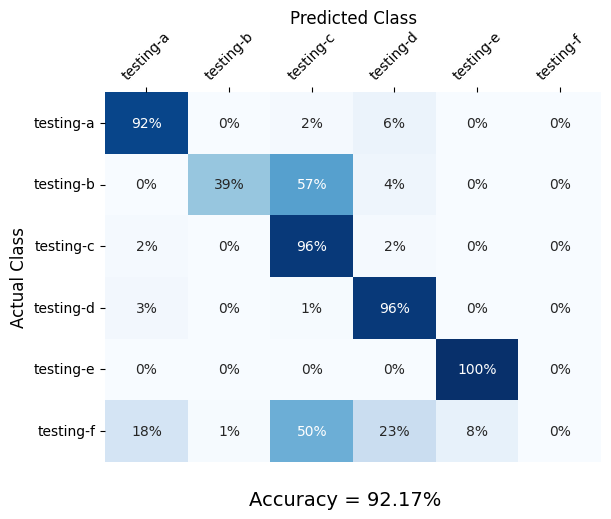

In [6]:
# Print a confusion matrix of predicted vs actual class labels
create_confusion_matrix(model, test_loader)

In [7]:
# Create another model with the augmented dataset
train_loader_aug, val_loader_aug, test_loader_aug = load_dataset(input_size, True)
replace_classifier(model_aug, model_name)

In [8]:
# train the model
train(model_aug, train_loader_aug, val_loader_aug, ('./models/best_' + model_name + '_augmented.pth'))

Using: [cuda] - [NVIDIA GeForce RTX 3080]
Saving the model with validation accuracy: 0.8077
Epoch [1/30], Training Loss: 0.7434 - Validation Loss: 0.5561 - Validation Accuracy: 0.8077
Saving the model with validation accuracy: 0.8252
Epoch [2/30], Training Loss: 0.5900 - Validation Loss: 0.4836 - Validation Accuracy: 0.8252
Epoch [3/30], Training Loss: 0.5593 - Validation Loss: 0.4960 - Validation Accuracy: 0.8113
Saving the model with validation accuracy: 0.8431
Epoch [4/30], Training Loss: 0.5470 - Validation Loss: 0.4298 - Validation Accuracy: 0.8431
Epoch [5/30], Training Loss: 0.5357 - Validation Loss: 0.4318 - Validation Accuracy: 0.8389
Epoch [6/30], Training Loss: 0.5294 - Validation Loss: 0.4970 - Validation Accuracy: 0.8315
Saving the model with validation accuracy: 0.8451
Epoch [7/30], Training Loss: 0.5354 - Validation Loss: 0.4069 - Validation Accuracy: 0.8451
Saving the model with validation accuracy: 0.8479
Epoch [8/30], Training Loss: 0.5046 - Validation Loss: 0.3866 - 

In [9]:
# Test the accuracy of the model with augmented data
load_model(model_aug, './models/best_' + model_name + '_augmented.pth')
evaluate_accuracy(model_aug, test_loader_aug)

Overall test accuracy: 85.82%


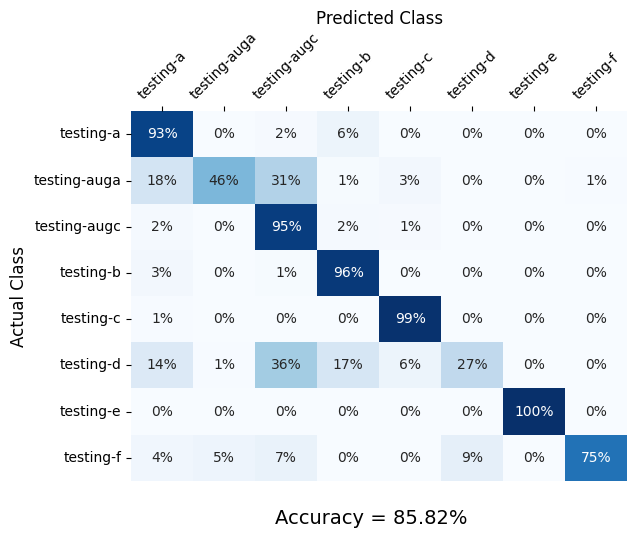

In [10]:
# Print a confusion matrix of predicted vs actual class labels
create_confusion_matrix(model_aug, test_loader_aug)